In [22]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [23]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [24]:
NUM_CLASSES = 9

# Dataset reading

In [25]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [26]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [29]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 9)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [31]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [32]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000

Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1079 - loss: 2.3415 - val_accuracy: 0.1250 - val_loss: 2.2350
Epoch 2/1000

Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1175 - loss: 2.2596 - val_accuracy: 0.1250 - val_loss: 2.1767
Epoch 3/1000

Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1190 - loss: 2.2220 - val_accuracy: 0.1250 - val_loss: 2.1552
Epoch 4/1000

Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1187 - loss: 2.1971 - val_accuracy: 0.1328 - val_loss: 2.1411
Epoch 5/1000

Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.keras
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1569 - loss: 2.1554 - val_accuracy: 0.169

In [33]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9938 - loss: 0.1495


In [34]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [35]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[5.8604186e-05 1.4946304e-08 9.2017176e-03 5.5141534e-11 5.3565208e-02
 3.7968199e-05 9.3280751e-01 3.8487080e-03 4.8029816e-04]
6


# Confusion matrix

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step


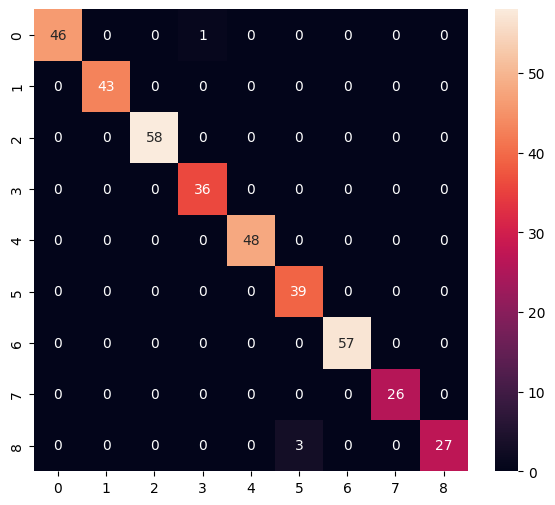

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        58
           3       0.97      1.00      0.99        36
           4       1.00      1.00      1.00        48
           5       0.93      1.00      0.96        39
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        26
           8       1.00      0.90      0.95        30

    accuracy                           0.99       384
   macro avg       0.99      0.99      0.99       384
weighted avg       0.99      0.99      0.99       384



In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [37]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [38]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/gw/m4mw36hj0fj66ny3__qck9jw0000gn/T/tmpaa3y9_ox/assets


INFO:tensorflow:Assets written to: /var/folders/gw/m4mw36hj0fj66ny3__qck9jw0000gn/T/tmpaa3y9_ox/assets


Saved artifact at '/var/folders/gw/m4mw36hj0fj66ny3__qck9jw0000gn/T/tmpaa3y9_ox'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 9), dtype=tf.float32, name=None)
Captures:
  13111249232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13111255760: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13111257296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13111252688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13111253648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13111248080: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1734527622.618913   37368 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1734527622.619219   37368 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.


6776

# Inference test

In [39]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [40]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [41]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [42]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 134 μs, sys: 46 μs, total: 180 μs
Wall time: 168 μs


print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))